<a href="https://colab.research.google.com/github/sofiagpmg/Detecting-Cyberbully/blob/main/XLNET_Simple_Transformer_20210415.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#!pip3 install --upgrade transformers
!pip install simpletransformers

In [ ]:
!pip3 install sentencepiece

In [ ]:
import pandas as pd
import numpy as np
import sklearn
from tqdm import tqdm, notebook
from tqdm import tqdm


In [ ]:

df = pd.read_csv('/content/drive/MyDrive/BERT_ICD10 classification/mtcompare_m3.csv',encoding = 'iso-8859-1',names=['id', 'text', 'ICD_Chapter', 'label'])
df.head()

,id,text,ICD_Chapter,label
0,id,text,ICD_Chapter,label
1,PAT001,subjective this 23-year-old white female prese...,Diseases of the respiratory system,1
2,PAT002,history a 34-year-old male presents today self...,Diseases of the respiratory system,1
3,PAT003,chief complaint this 5-year-old male presents ...,Diseases of the respiratory system,1
4,PAT004,history i had the pleasure of meeting and eval...,Diseases of the respiratory system,1


In [ ]:
df.columns

Index(['id', 'text', 'ICD_Chapter', 'label'], dtype='object')

In [ ]:
df = df.iloc[1:]

In [ ]:
df.head()

,id,text,ICD_Chapter,label
1,PAT001,subjective this 23-year-old white female prese...,Diseases of the respiratory system,1
2,PAT002,history a 34-year-old male presents today self...,Diseases of the respiratory system,1
3,PAT003,chief complaint this 5-year-old male presents ...,Diseases of the respiratory system,1
4,PAT004,history i had the pleasure of meeting and eval...,Diseases of the respiratory system,1
5,PAT005,history a 55-year-old female presents self-ref...,Diseases of the respiratory system,1


In [ ]:
df = df[['text', 'label']]

In [ ]:
df.label = pd.to_numeric(df.label, errors='coerce')
print(df.dtypes)

text     object
label     int64
dtype: object


In [ ]:
sorted(df.label.unique())
num_labels = df.label.nunique()
num_labels

7

In [ ]:
possible_labels = df.label.unique()
print(possible_labels)

[1 4 0 6 5 2 3]


In [ ]:
label_dict = {}
for index, possible_label in enumerate(possible_labels):
    label_dict[possible_label] = index

In [ ]:
df['label'] = df.label.replace(label_dict)

In [ ]:
from sklearn.model_selection import train_test_split
#target = 'label'

train_df, eval_df = train_test_split(df, test_size=0.2,stratify=df.label.values)

In [ ]:

from simpletransformers.classification import ClassificationModel
model_args = {
    "num_train_epochs": 1,
    "learning_rate": 2e-4,
    'overwrite_output_dir':True
}


# Create a ClassificationModel
model = ClassificationModel('xlnet', 'xlnet-base-cased', num_labels=num_labels, use_cuda=False, args=model_args)

Some weights of the model checkpoint at distilbert-base-cased were not used when initializing DistilBertForSequenceClassification: ['vocab_transform.weight', 'vocab_transform.bias', 'vocab_layer_norm.weight', 'vocab_layer_norm.bias', 'vocab_projector.weight', 'vocab_projector.bias']
- This IS expected if you are initializing DistilBertForSequenceClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing DistilBertForSequenceClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
Some weights of DistilBertForSequenceClassification were not initialized from the model checkpoint at distilbert-base-cased and are newly initialized: ['pre_classifier.weight', 'pre_classifier.bias', 'classifier

In [ ]:
%%time
# Train the model
model.train_model(train_df)

/usr/local/lib/python3.7/dist-packages/simpletransformers/classification/classification_model.py:449: UserWarning: Dataframe headers not specified. Falling back to using column 0 as text and column 1 as labels.
  "Dataframe headers not specified. Falling back to using column 0 as text and column 1 as labels."


  0%|          | 0/2992 [00:00<?, ?it/s]

Epoch:   0%|          | 0/1 [00:00<?, ?it/s]

Running Epoch 0 of 1:   0%|          | 0/374 [00:00<?, ?it/s]

CPU times: user 32min 54s, sys: 39.8 s, total: 33min 34s
Wall time: 33min 27s


(374, 1.2557423756642139)

In [ ]:
%%time
result, model_outputs, wrong_predictions = model.eval_model(eval_df)

/usr/local/lib/python3.7/dist-packages/simpletransformers/classification/classification_model.py:1029: UserWarning: Dataframe headers not specified. Falling back to using column 0 as text and column 1 as labels.
  "Dataframe headers not specified. Falling back to using column 0 as text and column 1 as labels."


  0%|          | 0/748 [00:00<?, ?it/s]

Running Evaluation:   0%|          | 0/94 [00:00<?, ?it/s]

CPU times: user 2min 21s, sys: 804 ms, total: 2min 21s
Wall time: 2min 22s


In [ ]:
from sklearn.metrics import f1_score, accuracy_score, classification_report


def f1_multiclass(labels, preds):
    return f1_score(labels, preds, average='micro')
    
result, model_outputs, wrong_predictions = model.eval_model(eval_df, f1=f1_multiclass, acc=accuracy_score)


/usr/local/lib/python3.7/dist-packages/simpletransformers/classification/classification_model.py:1029: UserWarning: Dataframe headers not specified. Falling back to using column 0 as text and column 1 as labels.
  "Dataframe headers not specified. Falling back to using column 0 as text and column 1 as labels."


  0%|          | 0/748 [00:00<?, ?it/s]

Running Evaluation:   0%|          | 0/94 [00:00<?, ?it/s]

In [ ]:
result

{'acc': 0.7179144385026738,
 'eval_loss': 0.8774985210534106,
 'f1': 0.7179144385026738,
 'mcc': 0.6640266709564969}

In [ ]:
model_outputs

array([[-0.10878482, -1.29245543,  4.36454487, ..., -0.18205175,
        -0.92969555, -0.56500131],
       [ 0.33101654, -1.20968485,  4.13602829, ..., -0.70733368,
        -0.77960545, -0.61705285],
       [-1.89812231, -1.38926888,  0.16377561, ...,  3.17167377,
         1.36099851, -1.08872235],
       ...,
       [-0.35571548, -0.88806772, -1.56434798, ..., -1.11406088,
        -0.85881984,  1.08423316],
       [-1.28096485, -1.78787172, -0.80262059, ...,  1.37226439,
         3.16437674, -1.00879002],
       [ 0.67201078, -1.24547827, -0.64753789, ...,  0.10652696,
         1.67238355, -0.82061291]])

In [ ]:
_, predictions, true_vals = model.eval_model(eval_df)

/usr/local/lib/python3.7/dist-packages/simpletransformers/classification/classification_model.py:1029: UserWarning: Dataframe headers not specified. Falling back to using column 0 as text and column 1 as labels.
  "Dataframe headers not specified. Falling back to using column 0 as text and column 1 as labels."


  0%|          | 0/748 [00:00<?, ?it/s]

Running Evaluation:   0%|          | 0/94 [00:00<?, ?it/s]

In [ ]:
from pandas import DataFrame
your_list = [predictions, true_vals]
df = DataFrame (your_list)


/usr/local/lib/python3.7/dist-packages/pandas/core/internals/construction.py:305: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  values = np.array([convert(v) for v in values])


In [ ]:
df.head()

,0
0,"[[-0.10878482460975647, -1.2924554347991943, 4..."
1,[]


In [ ]:
df.to_csv('check.csv')

In [ ]:
predictions = []
for x in model_outputs:
    predictions.append(np.argmax(x))

#print('f1 score:', f1_score(eval_df['label'], predictions,average='micro'))

#target_names = ['class 0', 'class 1', 'class 2']
print(classification_report(eval_df['label'], predictions,sorted(possible_labels)))#,target_names=sorted(df['label'].unique())))


              precision    recall  f1-score   support

           0       0.62      0.74      0.68        65
           1       0.77      0.78      0.77       178
           2       0.77      0.88      0.82       117
           3       0.75      0.69      0.72       124
           4       0.68      0.69      0.68        75
           5       0.57      0.49      0.53        59
           6       0.70      0.62      0.66       130

    accuracy                           0.72       748
   macro avg       0.69      0.70      0.69       748
weighted avg       0.72      0.72      0.72       748



In [ ]:
from sklearn.metrics import confusion_matrix
cf = confusion_matrix(eval_df['label'], predictions,sorted(possible_labels))

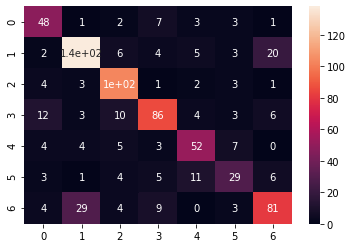

In [ ]:
import seaborn as sns
sns.heatmap(cf, annot=True)

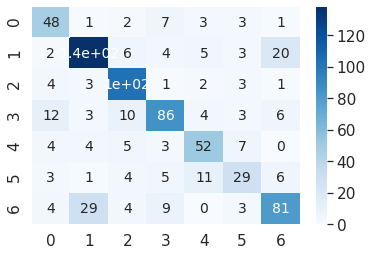

In [ ]:
sns.set(font_scale=1.4) # for label size
sns.heatmap(cf, annot=True, annot_kws={"size": 14}, cmap='Blues') # font size


In [ ]:
eval_df.to_csv('eval.csv')

In [ ]:
pred = pd.DataFrame(predictions, eval_df)
pred.to_csv('pred_chk.csv')

In [ ]:
#from sklearn import metrics
#print(metrics.classification_report(eval_df['label'], predictions, target_names=df['label'].unique()))

In [ ]:
#model.train_model(train_df)

#result, model_outputs, wrong_predictions = model.eval_model(eval_df)

#lst = []
#for arr in model_outputs:
#    lst.append(np.argmax(arr))
#true = eval_df['label'].tolist()
#predicted = lst
#sklearn.metrics.accuracy_score(true,predicted)

#https://stackoverflow.com/questions/64595546/higher-accuracy-using-simpletransformers-vs-transformers-library-with-bert

In [ ]:
#print(metrics.classification_report(true_vals, predictions, target_names=df['label'].unique()))
#https://github.com/shudima/notebooks/blob/master/BERT_to_the_rescue.ipynb


#model.train_model(train_df)

#result, model_outputs, wrong_predictions = model.eval_model(eval_df)

#lst = []
#for arr in model_outputs:
#    lst.append(np.argmax(arr))
#true = eval_df['label'].tolist()
#predicted = lst
#sklearn.metrics.accuracy_score(true,predicted)

https://medium.com/analytics-vidhya/step-by-step-implementation-of-bert-for-text-categorization-task-aba80417bd84

https://towardsdatascience.com/simple-transformers-introducing-the-easiest-bert-roberta-xlnet-and-xlm-library-58bf8c59b2a3
https://huggingface.co/transformers/pretrained_models.html
https://web.stanford.edu/class/archive/cs/cs224n/cs224n.1194/reports/custom/15785631.pdf

https://medium.com/analytics-vidhya/multiclass-text-categorization-97-perc-accuracy-bert-model-2b97d8118903

https://towardsdatascience.com/bert-text-classification-using-pytorch-723dfb8b6b5b

https://medium.com/analytics-vidhya/step-by-step-implementation-of-bert-for-text-categorization-task-aba80417bd84